In [33]:
# Imports 

In [34]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# read the data into an dataframe

In [70]:
df: pd.DataFrame = pd.read_csv('Datasets/i4talent_alt.csv', sep=',')
df['datum'] = pd.to_datetime(df['datum'], format='%d/%m/%Y')
df['geboortedatum'] = pd.to_datetime(df['geboortedatum'])
df['indiensttreding_datum'] = pd.to_datetime(df['indiensttreding_datum'])
df['uitdiensttreding_datum'] = pd.to_datetime(df['uitdiensttreding_datum'])

# Get the information of the dataframe
df.info()

ValueError: time data '12/31/18 5:06' does not match format '%d/%m/%Y' (match)

In [68]:
df.head(20)

,WerknemerID,datum,geboortedatum,indiensttreding_datum,uitdiensttreding_datum,leeftijd,lengte_dienst,stad,afdeling,klant_id,geslacht_id,geslacht,uitdiensttreding_reden,uitdiensttreding_type,STATUS_JAAR,STATUS,BUSINESS_UNIT
0,6962,2018-12-31 05:06:00,1989-06-26 05:06:00,2013-05-23 05:06:00,2005-01-01 05:06:00,29.0,5.0,Amstelveen,BI,30,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
1,22981,2016-12-30 05:06:00,1983-08-25 05:06:00,2010-04-24 05:06:00,2005-01-01 05:06:00,33.0,6.0,Utrecht,Accountant,21,M,Man,Niet van toepassing,Niet van toepassing,2016,Actief,Detachering
2,5325,2018-12-31 05:06:00,1976-04-24 05:06:00,2006-06-09 05:06:00,2005-01-01 05:06:00,42.0,12.0,Amsterdam,BI,42,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
3,8193,2018-12-31 05:06:00,1998-10-26 05:06:00,2018-04-28 05:06:00,2005-01-01 05:06:00,20.0,NaN,Utrecht,BI,21,V,Vrouw,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
4,5926,2013-12-31 05:06:00,1981-03-19 05:06:00,2009-01-09 05:06:00,2005-01-01 05:06:00,32.0,4.0,Den Haag,Accountant,18,M,Man,Niet van toepassing,Niet van toepassing,2013,Actief,Detachering
5,5445,2018-12-31 05:06:00,1977-05-02 05:06:00,2006-12-22 05:06:00,2005-01-01 05:06:00,41.0,12.0,Leiden,Business analist,33,M,Man,Niet van toepassing,Niet van toepassing,2018,Actief,Detachering
6,6427,2014-12-31 05:06:00,1985-04-01 05:06:00,2011-02-26 05:06:00,2005-01-01 05:06:00,29.0,3.0,NaN,NaN,46,M,Man,Niet van toepassing,Niet van toepassing,2014,Actief,Detachering
7,5186,2015-12-31 05:06:00,1975-01-26 05:06:00,2005-10-12 05:06:00,2005-01-01 05:06:00,40.0,10.0,Dordrecht,Business analist,26,M,Man,Niet van toepassing,Niet van toepassing,2015,Actief,Detachering
8,5387,2015-12-31 05:06:00,1976-11-06 05:06:00,2006-09-20 05:06:00,2019-12-30 05:06:00,39.0,9.0,Barendrecht,Financial controller,13,V,Vrouw,Niet van toepassing,Niet van toepassing,2015,Actief,Detachering
9,2481,2017-12-31 05:06:00,2060-06-05 05:06:00,1998-01-18 05:06:00,2005-01-01 05:06:00,57.0,19.0,Amsterdam,Accountant,41,M,Man,Niet van toepassing,Niet van toepassing,2017,Actief,Detachering


In [38]:
# Get the shape of the database
df.shape

(49753, 17)

In [39]:
# Get the missing values per column
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

leeftijd         5100
lengte_dienst    4951
stad             5543
afdeling         5065
dtype: int64

<Axes: >

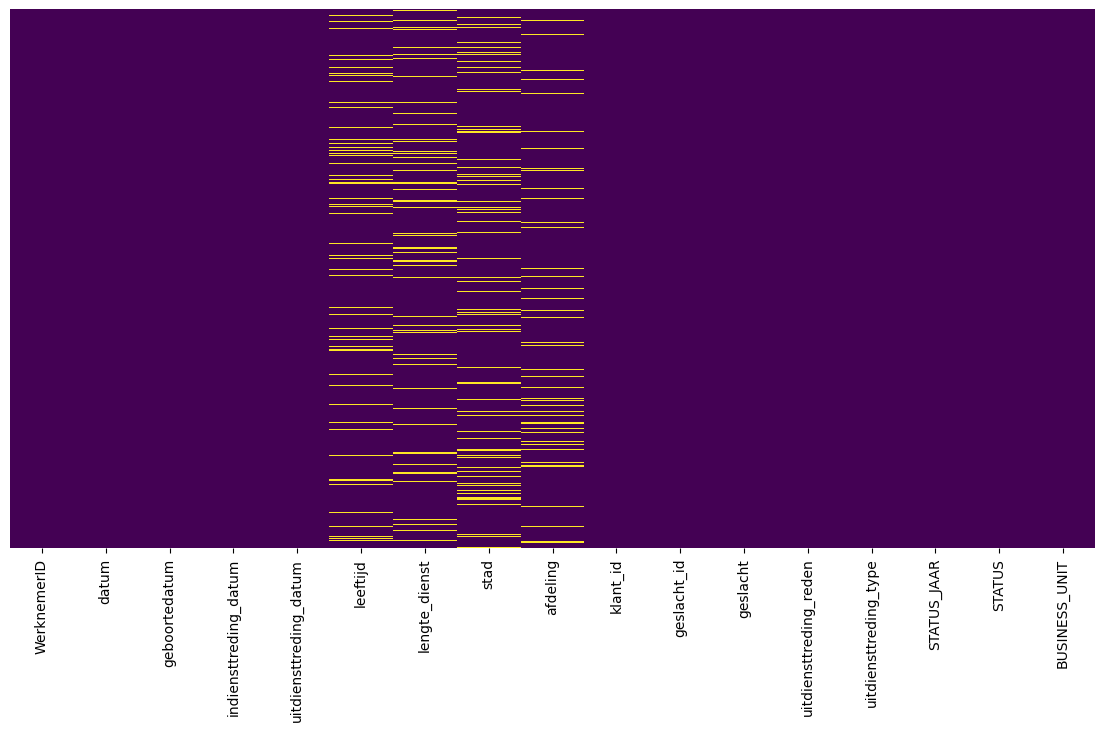

In [40]:
# Visualize if their is a link between the missing data
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

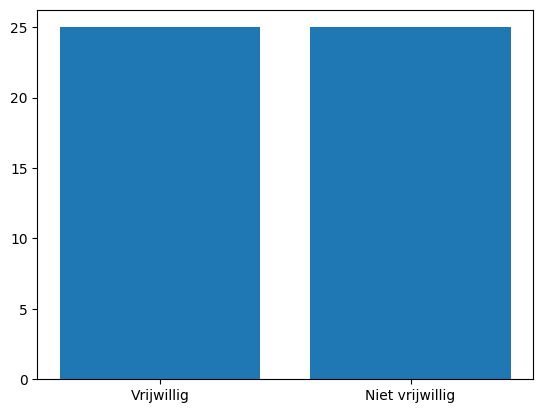

In [71]:
new_df = df[df['uitdiensttreding_type'] != 'Niet van toepassing']
plt.bar(new_df['uitdiensttreding_type'], new_df['lengte_dienst'])
plt.show()

In [73]:
new_df.describe()

,WerknemerID,leeftijd,lengte_dienst,klant_id,STATUS_JAAR
count,1487.000000,1326.000000,1346.000000,1487.000000,1487.000000
mean,6856.009415,51.449472,11.369985,25.590451,2015.683927
std,8064.102008,16.515427,6.783741,11.845619,3.002628
min,1338.000000,19.000000,0.000000,1.000000,2011.000000
25%,3006.500000,33.000000,7.000000,16.000000,2013.000000
50%,4636.000000,60.000000,13.000000,27.000000,2016.000000
75%,7090.000000,65.000000,13.000000,35.000000,2019.000000
max,45290.000000,65.000000,25.000000,46.000000,2020.000000


In [75]:
'''
If the uitdiensttreding_reden is Ontslag, de persoon is ontslagen.
If the uitdiensttreding_reden is Vertrek, de persoon heeft ontslag genomen.
If the uitdiensttreding_reden is Pension, de persoon heeft pension genomen.
'''

new_df

,WerknemerID,datum,geboortedatum,indiensttreding_datum,uitdiensttreding_datum,leeftijd,lengte_dienst,stad,afdeling,klant_id,geslacht_id,geslacht,uitdiensttreding_reden,uitdiensttreding_type,STATUS_JAAR,STATUS,BUSINESS_UNIT
10,7937,12/1/18 5:06,10/22/96 5:06,4/5/17 5:06,12/6/18 5:06,22.0,1.0,Amsterdam,Credit controller,44,V,Vrouw,Vertrek,Vrijwillig,2018,beëndiging,Detachering
16,8026,2/1/19 5:06,7/2/97 5:06,8/16/17 5:06,2/16/19 5:06,21.0,NaN,Dordrecht,BI,26,V,Vrouw,Vertrek,Vrijwillig,2019,beëndiging,Detachering
33,3169,12/1/19 5:06,12/20/63 5:06,12/2/99 5:06,12/30/19 5:06,56.0,20.0,Den Haag,Accountant,10,M,Man,Ontslag,Niet vrijwillig,2019,beëndiging,Detachering
46,3787,2/1/15 5:06,2/7/50 5:06,8/14/01 5:06,2/7/15 5:06,65.0,13.0,Middelburg,Financial controller,20,V,Vrouw,Pensioen,Vrijwillig,2015,beëndiging,Detachering
73,4169,12/1/19 5:06,4/22/69 5:06,9/26/02 5:06,12/30/19 5:06,50.0,17.0,Veenendaal,Business analist,14,M,Man,Ontslag,Niet vrijwillig,2019,beëndiging,Detachering
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49621,2495,7/1/11 5:06,7/30/46 5:06,2/4/98 5:06,7/30/11 5:06,65.0,NaN,Amsterdam,Accountant,35,V,Vrouw,Pensioen,Vrijwillig,2011,beëndiging,Detachering
49653,3216,7/1/13 5:06,7/9/48 5:06,1/15/00 5:06,7/10/13 5:06,65.0,13.0,NaN,Boekhouder,12,V,Vrouw,Pensioen,Vrijwillig,2013,beëndiging,Detachering
49694,7681,9/1/17 5:06,11/17/94 5:06,3/29/16 5:06,9/30/17 5:06,22.0,1.0,Rotterdam,BI,46,M,Man,Vertrek,Vrijwillig,2017,beëndiging,Detachering
49698,2987,11/30/12 5:06,12/8/47 5:06,6/15/99 5:06,12/7/12 5:06,65.0,13.0,Eindhoven,Financial controller,31,V,Vrouw,Pensioen,Vrijwillig,2012,beëndiging,Detachering


NameError: name 'new_df' is not defined